In [38]:
import pandas as pd
import numpy as np
import requests
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [90]:
cities = ['San Francisco, CA USA', 'Los Angeles, CA', 'San Diego, CA', 'Phoenix, AZ', 'Las Vegas, NV', 'Portland, PO',
         'Seattle, WA', 'New York City, NY', 'Chicago, IL', 'Houston, TX', 'Philadelphia, PA', 'San Antonio, TX',
         'Dallas, TX', 'San Jose, CA', 'Austin, TX', 'Boston, MA', 'Jacksonville, FL', 'Denver, CO', 'Charlotte, NC',
         'Columbus, OH', 'Fort Worth, TX', 'Indianapolis, IN', 'El Paso, TX', 'Nashville, TN', 'Detroit, MI',
        'Oklahoma City, OK', 'Memphis, TN', 'Baltimore, MD', 'Milwaukee, WI', 'Albuquerque, NM']
len(cities)

30

In [91]:
columns = ['City', 'Latitude', 'Longitude']
df = pd.DataFrame(columns=columns)
df

,City,Latitude,Longitude


In [92]:

for city in cities:    
    address = city
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df = df.append({'City' : city, 'Latitude' : latitude, 'Longitude' : longitude }, ignore_index=True)
    
locationUS = None    
location = geolocator.geocode(address)
latitudeUS = location.latitude
longitudeUS = location.longitude

In [93]:
df

,City,Latitude,Longitude
0,"San Francisco, CA USA",37.779026,-122.419906
1,"Los Angeles, CA",34.053691,-118.242767
2,"San Diego, CA",32.717421,-117.162771
3,"Phoenix, AZ",33.448437,-112.074142
4,"Las Vegas, NV",36.167256,-115.148516
5,"Portland, PO",45.520247,-122.674195
6,"Seattle, WA",47.603832,-122.330062
7,"New York City, NY",40.712728,-74.006015
8,"Chicago, IL",41.875562,-87.624421
9,"Houston, TX",29.758938,-95.367697


In [94]:
map_all_cities = folium.Map(location=[latitudeUS, longitudeUS],zoom_start=4)
# add markers to map
for lat, lng, city in zip(df['Latitude'], df['Longitude'], df['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_cities)  
    
map_all_cities

In [ ]:
https://maps.googleapis.com/maps/api/place/findplacefromtext/
    json?input=mongolian%20grill&inputtype=textquery&fields=
    formatted_address,name,&locationbias=circle:2000@47.6918452,-122.2226413&key=YOUR_API_KEY
        
        

In [30]:
CLIENT_ID = '2DOXBH2MNJAAJ1FWZ2PA2RV5VQUKRDYPLIDBA1JTBUGP4C30' # your Foursquare ID
CLIENT_SECRET = 'Y23SJ00FKE2N3ZVQ5DW2JE4O3O0ENL5PY2QQJLUQJUEH2TUJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [95]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 50000 # define radius

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [96]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [97]:
cities_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

San Francisco, CA USA
Los Angeles, CA
San Diego, CA
Phoenix, AZ
Las Vegas, NV
Portland, PO
Seattle, WA
New York City, NY
Chicago, IL
Houston, TX
Philadelphia, PA
San Antonio, TX
Dallas, TX
San Jose, CA
Austin, TX
Boston, MA
Jacksonville, FL
Denver, CO
Charlotte, NC
Columbus, OH
Fort Worth, TX
Indianapolis, IN
El Paso, TX
Nashville, TN
Detroit, MI
Oklahoma City, OK
Memphis, TN
Baltimore, MD
Milwaukee, WI
Albuquerque, NM


In [98]:
print(cities_venues.shape)
cities_venues.head()

(3000, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"San Francisco, CA USA",37.779026,-122.419906,SFJazz Center,37.776350,-122.421539,Jazz Club
1,"San Francisco, CA USA",37.779026,-122.419906,Salt & Straw,37.776532,-122.426051,Ice Cream Shop
2,"San Francisco, CA USA",37.779026,-122.419906,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
3,"San Francisco, CA USA",37.779026,-122.419906,Ritual Coffee Roasters,37.776476,-122.424281,Coffee Shop
4,"San Francisco, CA USA",37.779026,-122.419906,Blue Bottle Coffee,37.776430,-122.423224,Coffee Shop


In [99]:
print('There are {} uniques categories.'.format(len(cities_venues['Venue Category'].unique())))

There are 285 uniques categories.


In [100]:
# one hot encoding
cities_onehot = pd.get_dummies(cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['City'] = cities_venues['City'] 

# move neighborhood column to the first column
first_column = cities_onehot.pop('City')
cities_onehot.insert(0, 'City', first_column)

In [271]:
cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped


,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Stadium,Bath House,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Capitol Building,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mountain,Movie Theater,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Observatory,Opera House,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Resort,Restaurant,River,Rock Club,Romanian Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tiki Bar,Tour Provider,Toy / Game Store,Trade School,Trail,Train Station,Tram Station,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Wo

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [103]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cities_grouped['City']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head(20)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albuquerque, NM",Mexican Restaurant,Brewery,Pizza Place,Coffee Shop,Grocery Store,American Restaurant,BBQ Joint,Burger Joint,Breakfast Spot,Movie Theater
1,"Austin, TX",Coffee Shop,Hotel,Pizza Place,Park,Food Truck,Juice Bar,Taco Place,Brewery,Ice Cream Shop,Garden Center
2,"Baltimore, MD",Park,Seafood Restaurant,American Restaurant,BBQ Joint,Deli / Bodega,Gym,Ice Cream Shop,Fast Food Restaurant,Art Museum,Mexican Restaurant
3,"Boston, MA",Park,Bakery,Italian Restaurant,Brewery,Restaurant,Seafood Restaurant,Hotel,Trail,Pizza Place,Sandwich Place
4,"Charlotte, NC",Brewery,American Restaurant,Park,Bakery,Pizza Place,Café,Grocery Store,Deli / Bodega,BBQ Joint,Mexican Restaurant
5,"Chicago, IL",Hotel,Park,Ice Cream Shop,Coffee Shop,Yoga Studio,Liquor Store,Waterfront,French Restaurant,Italian Restaurant,Theater
6,"Columbus, OH",Park,Ice Cream Shop,Coffee Shop,American Restaurant,Bar,Grocery Store,Brewery,Café,Deli / Bodega,Gastropub
7,"Dallas, TX",Grocery Store,American Restaurant,Coffee Shop,Park,Fast Food Restaurant,New American Restaurant,Taco Place,Trail,Pizza Place,Hotel
8,"Denver, CO",Brewery,American Restaurant,Ice Cream Shop,Italian Restaurant,Coffee Shop,Breakfast Spot,Pizza Place,Sandwich Place,New American Restaurant,Hotel
9,"Detroit, MI",Park,History Museum,Coffee Shop,Brewery,Farmers Market,Art Gallery,Hotel,Bakery,Grocery Store,Diner


In [104]:
# set number of clusters
kclusters = 5

cities_grouped_clustering = cities_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 2, 2, 1, 2, 1, 4, 1, 2], dtype=int32)

In [105]:
# add clustering labels

cities_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

cities_merged = cities_venues_sorted

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(df.set_index('City'), on='City')

In [106]:
cities_merged

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,"Albuquerque, NM",4,Mexican Restaurant,Brewery,Pizza Place,Coffee Shop,Grocery Store,American Restaurant,BBQ Joint,Burger Joint,Breakfast Spot,Movie Theater,35.084103,-106.650985
1,"Austin, TX",0,Coffee Shop,Hotel,Pizza Place,Park,Food Truck,Juice Bar,Taco Place,Brewery,Ice Cream Shop,Garden Center,30.271129,-97.743700
2,"Baltimore, MD",2,Park,Seafood Restaurant,American Restaurant,BBQ Joint,Deli / Bodega,Gym,Ice Cream Shop,Fast Food Restaurant,Art Museum,Mexican Restaurant,39.290882,-76.610759
3,"Boston, MA",2,Park,Bakery,Italian Restaurant,Brewery,Restaurant,Seafood Restaurant,Hotel,Trail,Pizza Place,Sandwich Place,42.360253,-71.058291
4,"Charlotte, NC",1,Brewery,American Restaurant,Park,Bakery,Pizza Place,Café,Grocery Store,Deli / Bodega,BBQ Joint,Mexican Restaurant,35.227200,-80.843083
5,"Chicago, IL",2,Hotel,Park,Ice Cream Shop,Coffee Shop,Yoga Studio,Liquor Store,Waterfront,French Restaurant,Italian Restaurant,Theater,41.875562,-87.624421
6,"Columbus, OH",1,Park,Ice Cream Shop,Coffee Shop,American Restaurant,Bar,Grocery Store,Brewery,Café,Deli / Bodega,Gastropub,39.962260,-83.000707
7,"Dallas, TX",4,Grocery Store,American Restaurant,Coffee Shop,Park,Fast Food Restaurant,New American Restaurant,Taco Place,Trail,Pizza Place,Hotel,32.776272,-96.796856
8,"Denver, CO",1,Brewery,American Restaurant,Ice Cream Shop,Italian Restaurant,Coffee Shop,Breakfast Spot,Pizza Place,Sandwich Place,New American Restaurant,Hotel,39.739236,-104.984862
9,"Detroit, MI",2,Park,History Museum,Coffee Shop,Brewery,Farmers Market,Art Gallery,Hotel,Bakery,Grocery Store,Diner,42.331551,-83.046640


In [107]:
# create map
map_clusters = folium.Map(location=[latitudeUS, longitudeUS], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['City'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [325]:
ca_tx = cities_merged[cities_merged['Cluster Labels'] == 0]
po_az_southEast = cities_merged[cities_merged['Cluster Labels'] == 1]
sd_north = cities_merged[cities_merged['Cluster Labels'] == 2]
vegas = cities_merged[cities_merged['Cluster Labels'] == 3]
south = cities_merged[cities_merged['Cluster Labels'] == 4]

list_cluster = [ca_tx, po_az_southEast, sd_north, vegas, south]
titles = list()
for k in range(5):
    lst = list(list_cluster[k].City)
    titles.append(' '.join(lst))

In [303]:
top_10_clusters = list()
for df in list_cluster:
    temp_list = list()
    for col in range(2, 12):        
        for i in range(0, df.shape[0]):
            temp_list.append(df.iloc[i, col])
    top_10_clusters.append(temp_list)
    

In [309]:
from collections import Counter
df_clusters = list()
for k in range(5):
    each_cluster = Counter(top_10_clusters[k])
    temp_df = pd.DataFrame.from_dict(each_cluster, orient='index').reset_index()
    col = ['Business Category', 'Count']
    temp_df.columns = col
    temp_df.sort_values(by=['Count'], inplace=True)
    df_clusters.append(temp_df)


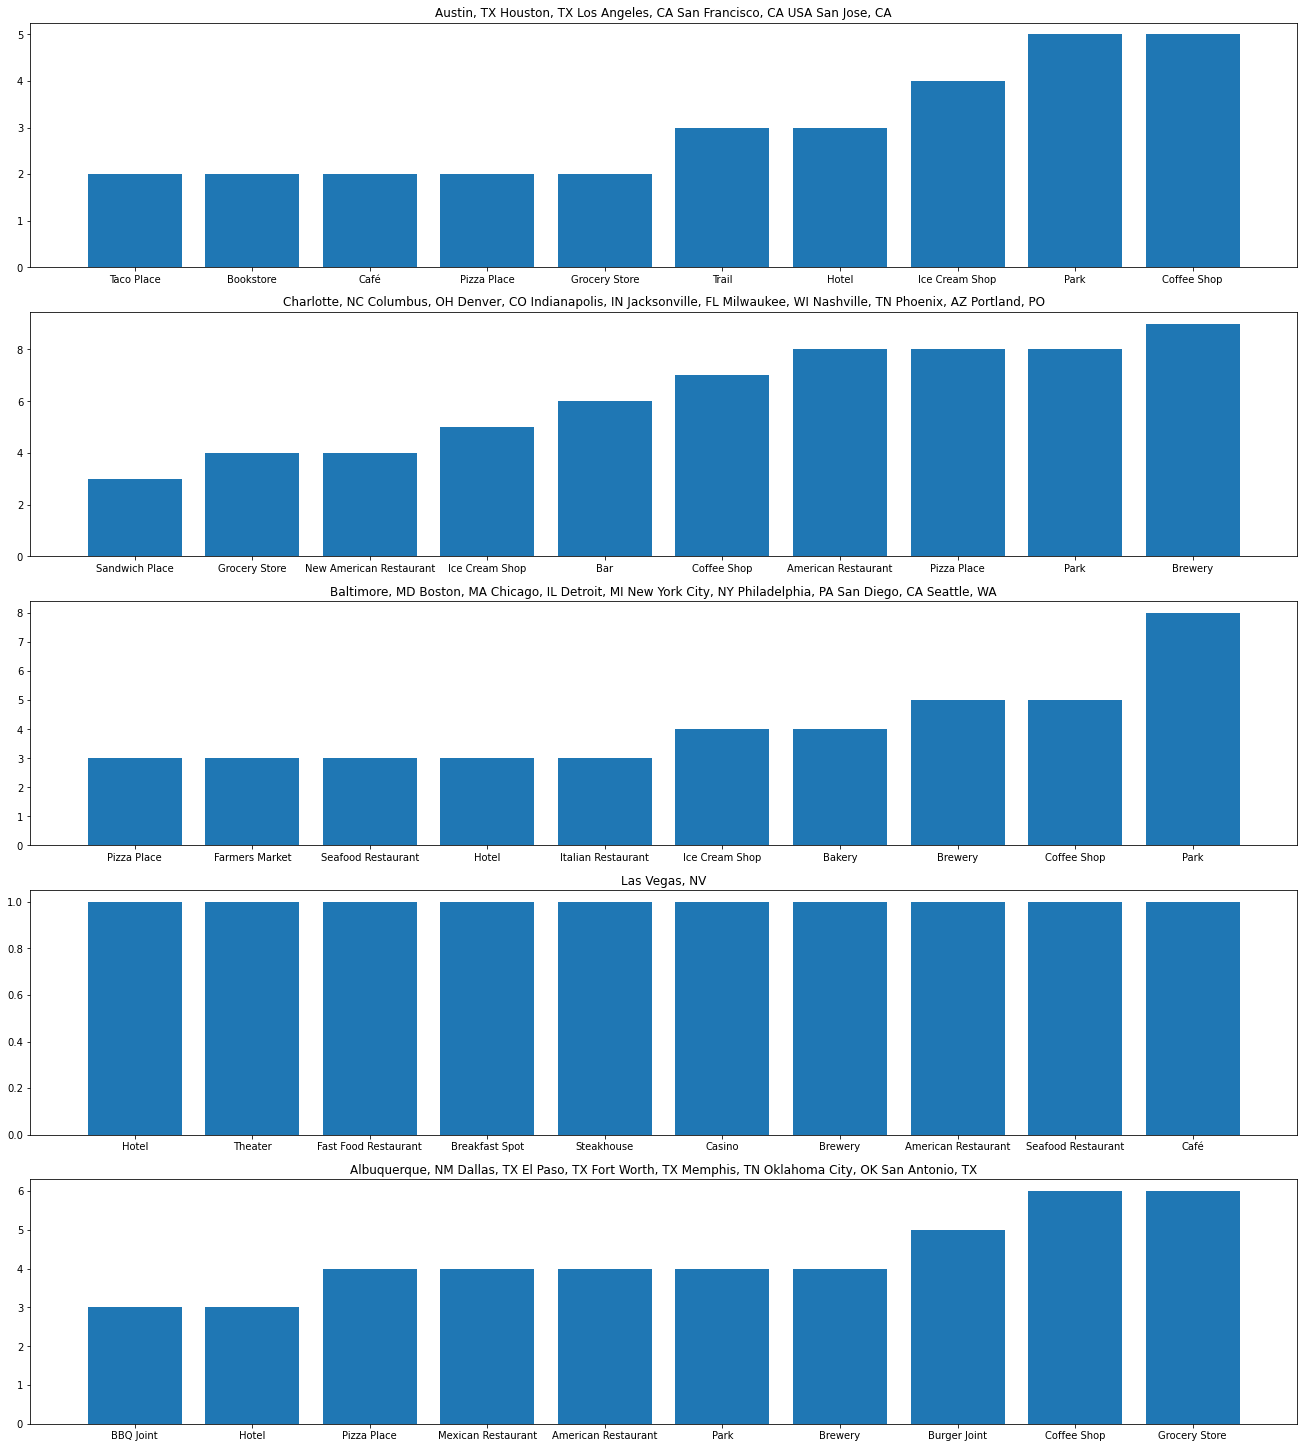

In [324]:
fig, axs = plt.subplots(5, 1, figsize=(18, 20), constrained_layout=True)
for ax, k in zip(axs, range(5)):
    ax.bar(df_clusters[k].iloc[-10:,0], df_clusters[k].iloc[-10:,1])
    ax.set_title(titles[k])